In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

import xgboost as xgb

In [14]:
irritation = pd.read_csv('C:/Users/Таня/Desktop/просто/наше/Хакатон_сбер/irritation.csv')
irritation

,SMILES,Class
0,CC#CC,1
1,CCC=C,1
2,O=CC=O,1
3,CCC=O,1
4,FCC#N,1
...,...,...
5215,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0
5216,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0
5217,CN(C(=O)C)c1c(I)c(NC(=O)C)c(I)c(C(=O)NC(C=O)C(...,0
5218,CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCCO)c(I)c(C(=O)N...,0


In [15]:
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors

# Функция для получения молекулярных дескрипторов
def get_molecular_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(descriptor_names)  # Возвращаем None для всех дескрипторов, если SMILES некорректен
    descriptors = descriptor_calculator.CalcDescriptors(mol)
    return descriptors

# Предполагаем, что ваш DataFrame уже загружен и называется melanin
# Получаем список доступных дескрипторов
descriptor_names = [desc[0] for desc in Chem.Descriptors._descList]  # Извлекаем только имена дескрипторов
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Применяем функцию к столбцу SMILES и создаем новый DataFrame с дескрипторами
descriptors_df = irritation['SMILES'].apply(get_molecular_descriptors).apply(pd.Series)

# Переименовываем столбцы дескрипторов
descriptors_df.columns = descriptor_names

# Объединяем оригинальный DataFrame с новыми дескрипторами
result_df = pd.concat([irritation, descriptors_df], axis=1)

# Сохраняем результат в новый CSV файл
result_df.to_csv('irritation_with_descriptors.csv', index=False)

print("Дескрипторы успешно извлечены и сохранены в 'irritation_with_descriptors.csv'.")

Дескрипторы успешно извлечены и сохранены в 'irritation_with_descriptors.csv'.


In [16]:
irritation_with_descriptors = pd.read_csv('C:/Users/Таня/Desktop/просто/наше/ProstoSPB-Hackathon/notebooks/irritation_with_descriptors.csv')
irritation_with_descriptors

,SMILES,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC#CC,1,2.680556,2.680556,1.819444,1.819444,0.362198,3.500000,54.092,48.044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CCC=C,1,3.479167,3.479167,1.083333,1.083333,0.399987,6.250000,56.108,48.044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,O=CC=O,1,8.805556,8.805556,0.194444,0.194444,0.297340,5.000000,58.036,56.020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CCC=O,1,9.173611,9.173611,0.638889,0.638889,0.403260,6.250000,58.080,52.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FCC#N,1,10.361111,10.361111,0.875000,-0.875000,0.397829,5.000000,59.043,57.027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,12.568397,0.020300,-1.012485,0.162215,55.545455,780.949,716.437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5216,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,12.568397,0.045206,-1.012485,0.162215,55.545455,780.949,716.437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5217,CN(C(=O)C)c1c(I)c(NC(=O)C)c(I)c(C(=O)NC(C=O)C(...,0,13.113247,13.113247,0.022882,-1.910232,0.147617,14.687500,789.099,766.923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5218,CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCCO)c(I)c(C(=O)N...,0,12.949494,12.949494,0.031563,-1.256091,0.139865,12.781250,791.115,766.923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
irritation_with_descriptors.value_counts('Class')

Class
1    3874
0    1346
Name: count, dtype: int64

In [18]:
irritation_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Columns: 219 entries, SMILES to fr_urea
dtypes: float64(217), int64(1), object(1)
memory usage: 8.7+ MB


In [19]:
irritation_with_descriptors.describe()

C:\Users\Таня\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Таня\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,...,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,0.742146,9.302957,9.302957,0.383379,-0.550844,0.559762,14.012180,222.879958,209.578027,222.542693,...,0.028927,0.029310,0.006513,0.010728,0.005172,0.011686,0.000575,0.011877,0.403640,0.016858
std,0.437495,3.127405,3.127405,0.444394,1.435750,0.157888,8.573797,114.990783,108.634870,114.859904,...,0.190114,0.193056,0.082798,0.113641,0.071740,0.112699,0.023969,0.110099,1.909052,0.142861
min,0.000000,1.500000,1.500000,0.000000,-9.810281,0.043742,3.500000,54.092000,48.044000,54.046950,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.279478,6.279478,0.087288,-0.972107,0.458675,9.500000,144.177000,135.533000,144.068748,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10.312226,10.312226,0.233160,-0.345058,0.562464,10.500000,186.793000,177.988000,186.078644,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,11.520418,11.520418,0.578426,0.367405,0.669075,14.666667,272.747000,256.223000,272.136850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,17.442653,17.442653,7.484515,2.000000,0.940384,64.384615,794.976000,766.923000,794.445257,...,4.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,28.000000,4.000000


In [20]:
irritation_with_descriptors = irritation_with_descriptors.drop('SMILES', axis=1)

In [21]:


# Вычисляем третий квартиль для каждого столбца
q3 = irritation_with_descriptors.quantile(0.75)

# Отбираем только те столбцы, где Q3 > 0
filtered_irritation_with_descriptors = irritation_with_descriptors.loc[:, q3 > 0]

filtered_irritation_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Columns: 109 entries, Class to fr_halogen
dtypes: float64(108), int64(1)
memory usage: 4.3 MB


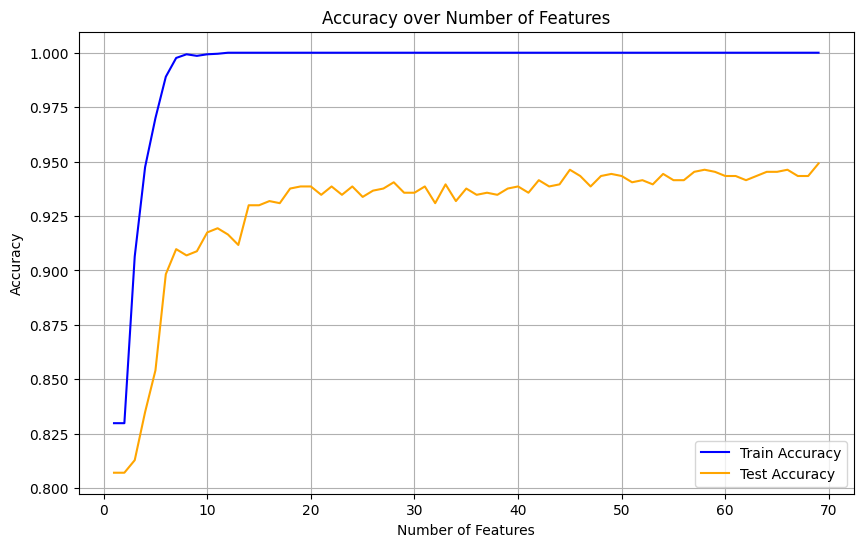

Максимальная тестовая точность: 0.9491 достигнута при использовании 69 признаков.
Тестовая точность на отфильтрованных признаках: 0.9491
Важность признаков:
                Feature  Importance
9   NumValenceElectrons    0.654393
15     FpDensityMorgan3    0.029321
41            LabuteASA    0.025358
53             SMR_VSA3    0.022302
22               AvgIpc    0.011648
..                  ...         ...
68         EState_VSA10    0.001525
52            SMR_VSA10    0.001285
67          EState_VSA1    0.001126
8            ExactMolWt    0.000405
1        MaxEStateIndex    0.000000

[69 rows x 2 columns]


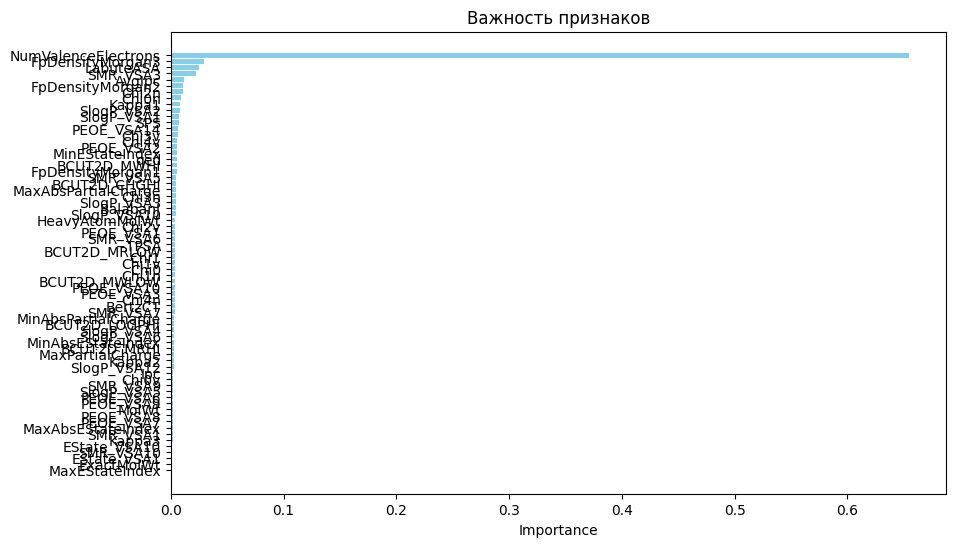

In [27]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Предполагается, что filtered_melanin_with_descriptors уже определен
X = filtered_irritation_with_descriptors.drop('Class', axis=1)
y = filtered_irritation_with_descriptors['Class']

# Оставляем только числовые признаки
X = X.select_dtypes(include=[np.number])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Удаление строк с NaN или inf
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train[X_train.index]  # Обновляем y_train, чтобы он соответствовал X_train

X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_test = y_test[X_test.index]  # Обновляем y_test, чтобы он соответствовал X_test

# Инициализация модели XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Словарь для хранения метрик
train_accuracies = []
test_accuracies = []

# Обучение модели с отслеживанием метрик
for i in range(1, X_train.shape[1] + 1):
    # Обучаем модель на первых i признаках
    xgb_model.fit(X_train.iloc[:, :i], y_train)
    
    # Предсказания на обучающей и тестовой выборках
    y_train_pred = xgb_model.predict(X_train.iloc[:, :i])
    y_test_pred = xgb_model.predict(X_test.iloc[:, :i])
    
    # Вычисление точности
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Построение графика обучения
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train.shape[1] + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, X_train.shape[1] + 1), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Accuracy over Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Найти количество признаков, при котором тестовая точность максимальна
max_test_accuracy = max(test_accuracies)
optimal_num_features = test_accuracies.index(max_test_accuracy) + 1  # +1, так как индексация начинается с 0

print(f"Максимальная тестовая точность: {max_test_accuracy:.4f} достигнута при использовании {optimal_num_features} признаков.")

# Создаем новый набор данных с отфильтрованными признаками
num_features_to_keep = 70
if optimal_num_features > num_features_to_keep:
    optimal_num_features = num_features_to_keep

filtered_irritation_with_descriptors = filtered_irritation_with_descriptors.iloc[:, :optimal_num_features + 1]  # +1 для 'Class'

# Разделение данных на обучающую и тестовую выборки с отфильтрованными признаками
X = filtered_irritation_with_descriptors.drop('Class', axis=1)
y = filtered_irritation_with_descriptors['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Удаление строк с NaN или inf
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train[X_train.index]  # Обновляем y_train, чтобы он соответствовал X_train

X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_test = y_test[X_test.index]  # Обновляем y_test, чтобы он соответствовал X_test

# Обучение модели на отфильтрованных признаках
xgb_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_test_pred_filtered = xgb_model.predict(X_test)

# Вычисление точности на тестовой выборке
test_accuracy_filtered = accuracy_score(y_test, y_test_pred_filtered)
print(f"Тестовая точность на отфильтрованных признаках: {test_accuracy_filtered:.4f}")

# Важность признаков
importance = xgb_model.feature_importances_

# Убедитесь, что длины совпадают
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Важность признаков:")
print(importance_df)

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()